<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics_february_20/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

# Основные понятия статистики



Возьмем данные о фильмах с контентом на английском языке: данные представляют собой таблицу, в которой каждая строчка - это фильм, а столбцы - это атрибуты фильма. 

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url="http://yustiks.ru/dataset/FilmTV_dataset.csv"
df=pd.read_csv(url)

In [3]:
len(df)

46907

*   **filmtv_ID** FilmTV ID - id фильма
*   **film_title** Movie Title - наименование фильма
*   **year** Year of Release - год выпуска
*   **genre** Movie Genre - жанр фильма
*   **duration** Movie Duration - продолжительность фильма
*   **country** Movie Country - страна производства
*   **director** Movie Director - режиссер
*   **actors** Movie Actors - актеры
*   **avg_vote** Movie Average Vote - средняя оценка
*   **votes** Movie Number of Votes - количество проголосовавших


Посмотрим основные колонки из таблицы (head() - выводит первые пять фильмов)

In [4]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


# Математические ожидание и среднее значение

Каждая колонка таблицы - это атрибут - некоторая случайное распределение. В данном контексте возьмем duration (сколько идет фильм в секундах) и avg_vote (средняя оценка фильма).
Построим точечный график двух величин.

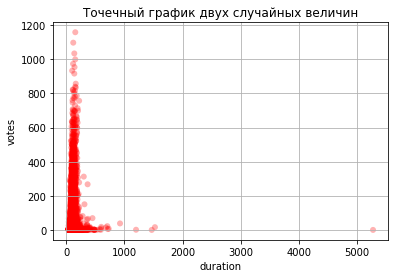

In [5]:
duration = df['duration']
votes = df['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Точечный график двух случайных величин')
plt.show()

Рассмотрим атрибут duration - сколько длится фильм по времени.

# Среднее значение случайной величины

Посчитаем среднее значение случайной величины:

Складываем все значения выборки и делим на количество элементов в выборке

In [6]:
statistics.mean(df['duration'])

99.23111689086916

In [7]:
sum(df['duration'])/len(df['duration'])

99.23111689086916

# Медиана

Возьмем колонку Duration - продолжительность фильма - и посчитаем медиану. **Медиана** - это такое значение случайного распределения, что ровно половина выборки меньше него, а ровно половина - больше. 

1ый способ:

In [8]:
# Извлекаем duration 
duration = df['duration']

# Находим их количество
num_duration = len(duration)

# Сортируем в порядке возрастания
sorted_duration = sorted(duration)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_duration // 2)
if num_duration % 2 == 0:
  result = (sorted_duration[middle-1] + sorted_duration[middle])/2
else:
  result = sorted_duration[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  95


2ой способ:

In [9]:
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95


# Мода

Мода - значение, которое наиболее часто встречается в выборке

In [10]:
%%time

# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)


Значение моды:  90 Количество встречаемости:  5511
Wall time: 14.9 ms


In [11]:
%%time
print('Значение моды: ', statistics.mode(duration))

Значение моды:  90
Wall time: 13.4 ms


# Минимум и максимум

In [12]:
min(duration)

40

In [13]:
max(duration)

5280

# Выбросы

В табличных данных выбросы - либо переменной нет в таблице, либо значение слишком варьируется от среднего значения выборки.

**Выбросы** - отсутствующих значений в данной колонке нет

In [14]:
duration.isnull().sum()

0

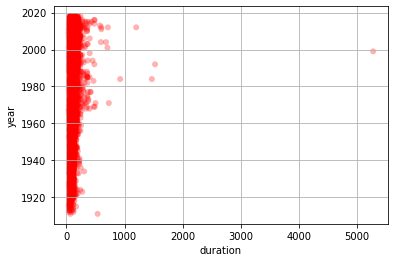

In [15]:
duration = df['duration']
year = df['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

Фильм, продолжительность которого составляет более 5000 секунд:

In [16]:
df.loc[df['duration'] > 5000, :]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
27639,35647,Farscape,1999,Adventure,5280,United States,"Geoff Bennett, Tony Tilse, Ian Watson","Ben Browder, Virginia Hey, Wayne Pigram, Claud...",8.0,1


Оказывается, что "Farscape" - австралийско-американский фантастический телевизионный сериал. Всего в данном сериале 90 серий. 

По графику можно увидеть, что есть некие значения, выходящие за рамки всех остальных значений. Найдем его.

In [17]:
duration[duration>600]

23844     924
23845    1525
23846     729
24019     680
27462    1470
27639    5280
39271     713
41240    1200
42871     705
Name: duration, dtype: int64

Удалим эти значения, считая их выбросами.

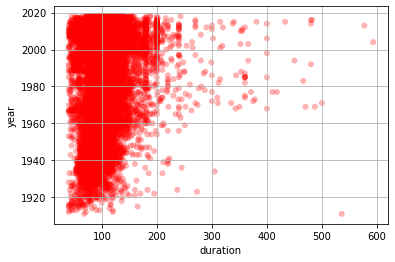

In [18]:
# из распределения выбираем только те значения которые меньше 600
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

Можно заметить, что картина стала более ясная после удаления выбросов.

Есть отсутствующие значения в колонке actors

In [19]:
df['actors'].isnull().sum()

129

Посмотрим эти значения

In [20]:
df[df['actors'].isnull()]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
116,144,Africa addio,1966,Documentary,140,Italy,"Gualtiero Jacopetti, Franco Prosperi",NaN,4.9,22
216,260,The Land Before Time,1988,Animation,79,United States,Don Bluth,NaN,7.5,81
570,679,Asterix et le coup de menhir,1989,Animation,81,France,Philippe Grimond,NaN,7.5,34
573,682,Atlantis,1991,Documentary,78,France,Luc Besson,NaN,5.9,10
...,...,...,...,...,...,...,...,...,...,...
13562,15137,Roger and Me,1989,Documentary,90,United States,Michael Moore,NaN,7.3,24
13576,15153,Nudo e crudele,1984,Documentary,96,Italy,Albert Thomas (Bitto Albertini),NaN,2.9,17
13612,15195,La donna nel mondo,1963,Documentary,118,Italy,"Gualtiero Jacopetti, Paolo Cavara, Franco Pros...",NaN,4.0,12
13632,15217,Sogni infranti (ragionamenti e deliri),1995,Documentary,95,Italy,Marco Bellocchio,NaN,7.3,5


Действительно, все актеры в выборке, заданной формулой выше, имеют отсутствующее значение (Nan)

# Стандартное отклонение - standard deviation

Мера разброса данных (насколько данные варьируются от среднего значения) - **Среднеквадрати́ческое отклоне́ние (среднее квадрати́ческое отклоне́ние, среднеквадрати́чное отклоне́ние, квадрати́чное отклоне́ние, станда́ртное отклоне́ние, станда́ртный разбро́с**.

![alt text](https://sun9-53.userapi.com/c858336/v858336794/16b91a/Ek5MlWa4dVM.jpg)

Показывает, насколько в целом данные разбросаны относительно среднего значения. Маленькое среднеквадратическое значение свидетельствует о том, что данные имеют значение, близкое к среднему. С помощью данной величины можно посчитать доверительный интервал - сколько элементов из имеющегося распределения находится в определенном интервале?

1ой метод вычисления:

In [24]:
%%time
statistics.pstdev(duration)

Wall time: 134 ms


34.95860443683266

2ой метод вычисления:

In [25]:
%%time

def stdev(nums):
    diffs = 0
    # считаем среднее значение
    avg = sum(nums)/len(nums)
    for n in nums:
        # считаем сумму квадратичных отклонений
        diffs += (n - avg)**(2)
    # считаем корень среднеквадратичного значения
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(duration))

34.9589770801773
Wall time: 21.8 ms


# Дисперсия - Variance

Дисперсия - квадрат стандартного отклонения

In [27]:
statistics.pvariance(duration)

1222.1040241709359

In [28]:
34.9589770801773**2

1222.1300784923617

In [29]:
def dispersia(nums):
    diffs = 0
    # считаем среднее значение
    avg = sum(nums)/len(nums)
    for n in nums:
        # считаем сумму квадратичных отклонений
        diffs += (n - avg)**(2)
    # считаем среднеквадратичного значения
    return (diffs/(len(nums)-1))

print(dispersia(duration))

1222.130078492362


# Размах

Разница между минимальным и максимальным значениями

In [30]:
duration_range = max(duration) - min(duration)
print(duration_range)

5240


Можно посмотреть разброс фильмов по их продолжительности: посмотрим продолжительность всех фильмов (кроме одного, самого длинного фильма).

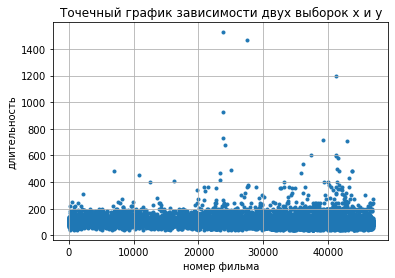

In [31]:
y = df.loc[df['duration'] < 5000, 'duration']

plt.xlabel('номер фильма')
plt.ylabel('длительность')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
# вектор от 0 до количество фильмов - 1 (так как мы удалили один фильм в первой строчке)
x = [i for i in range(0, len(duration)-1)]
plt.scatter(x, y, marker='.')
plt.show()

# Коррелляция

Корреляция - линейная взаимосвязь двух распределений друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, можно к примеру построить точечный график зависимости друг от друга. Как вариант, возьмер 2 параметра - duration (продолжительность фильма) и avg_vote (средняя оценка). Зависит ли средняя оценка фильма от того, насколько долго он идет?

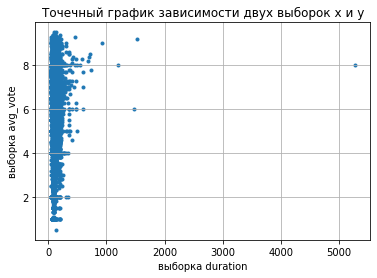

In [45]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

Удалим фильм под номером 35647 - сериал "Farscape", так как он явно является нестандартом (или выбросом). 

In [46]:
df = df.loc[df['filmtv_ID']!=35647, :]

После удаления фильма график получился более точным

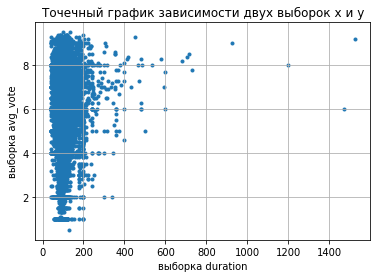

In [47]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

**Выводы по графику** - чем длиннее фильм, тем выше у данного фильма оценка.

По данному графику можно заметить, что чем короткие фильмы имеют разные оценки - как низкие, так и высокие. Фильмы средней и большой длины имеют тенденция получать высокие оценки. Таким образом, между двумя выборками мы можем увидеть сильную коррелляцию.

# Нормальное распределение

**Посмотрим как выглядит нормальное распределение на практике**. Возьмем табличное значение avg_vote - среднее значение голосов за данный фильм. Посмотрим график распределения данной величины.

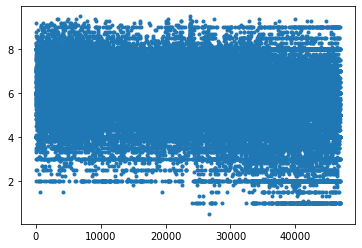

In [48]:
len_column = len(df['avg_vote']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, df['avg_vote'], marker='.')

По такому графику сложно понять, какое это распределение. Построим **частотный график** значений. 

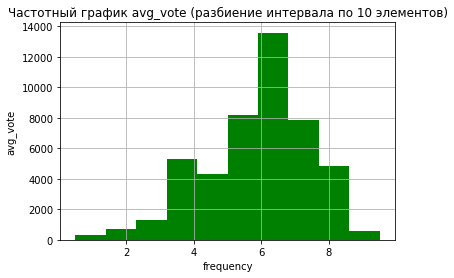

In [49]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['avg_vote'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотный график схож с **нормальным распределением** с некоторыми отклонениями. Мы можем поменять количество разбиений наших значений с 10 на 100:

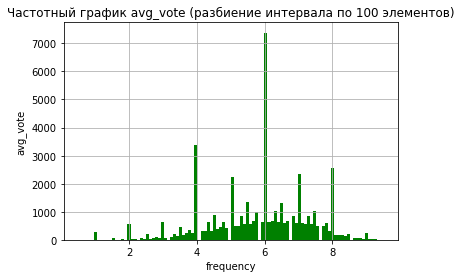

In [50]:
n, bins, patches = plt.hist(df['avg_vote'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Можно заметить, что у фильмов больше всего оценок 6 (всего таких фильмов со средней оценкой 6 более 7000)

**Зададим нормальное распределение теоретически.**

Зададим 2 выборки с нормальным распределением и построим точечный график зависимости двух переменных друг от друга.
Параметр ```loc``` задаёт $\mu$ или среднее значение, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


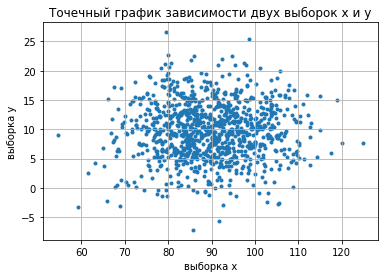

In [51]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим 2 нормально распределенные случайные величины
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

# построим точечный график зависимости двух переменных

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Частотный график выборки y  (или график плотности вероятности).

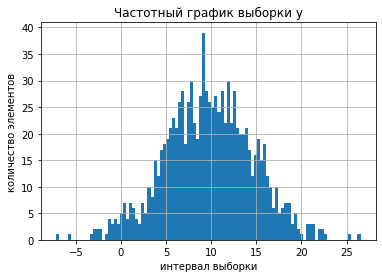

In [52]:
plt.hist(y,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

2-ой способ теоритической генерации нормального распределения: модуль random. 

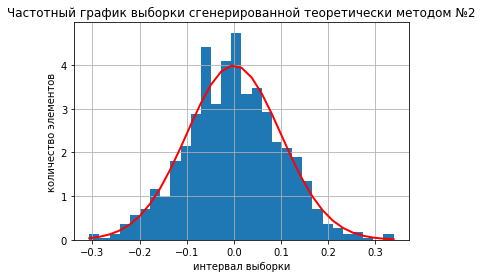

In [54]:
mu, sigma = 0, 0.1 # среднее значение и стандартное отклонение
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
# bins - разбиение интервала
# формула плотности распределения Гаусса
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки сгенерированной теоретически методом №2')
plt.grid(True)
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [57]:
norm_rv1.pdf(3)

1.4622963575006582e-18

Построим графики функции плотности вероятности от различных выборок (с разными параметрами):

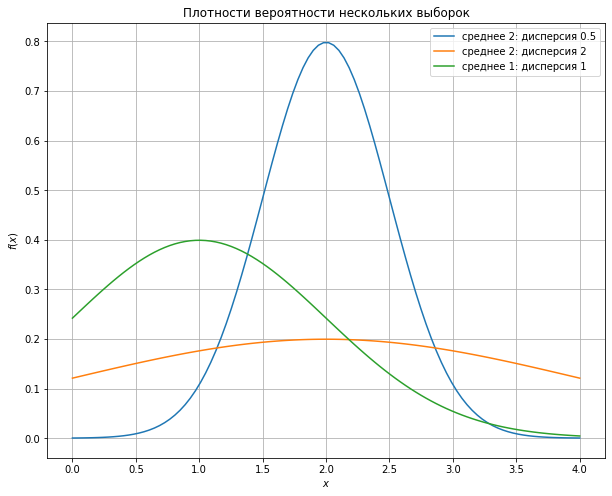

In [58]:
# зададим нормально распределенную случайную величину для нескольких выборок
norm_rv = sts.norm(loc=2, scale=0.5)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)

# зададим вектор x от 0 до 4 с шагом 100 для отрисовки результата
x = np.linspace(0,4,100) 
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(10,8))
plt.plot(x, pdf)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['среднее 2: дисперсия 0.5',  'среднее 2: дисперсия 2', 'среднее 1: дисперсия 1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.grid(True)

# Равномерное распределение на отрезке

Равномерное распределение на практике - это числа идущие последовательно от 0 до целого числа N. В равномерной выборке каждый элемент встречается одинаковое число раз.

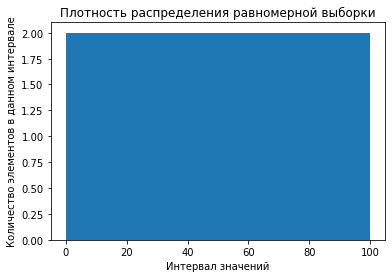

In [59]:
x = np.linspace(0, 100, 100)

plt.ylabel('Количество элементов в данном интервале')
plt.xlabel('Интервал значений')
plt.title('Плотность распределения равномерной выборки')
plt.hist(x, 50)
plt.show()

Сгенерируем теоретически выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

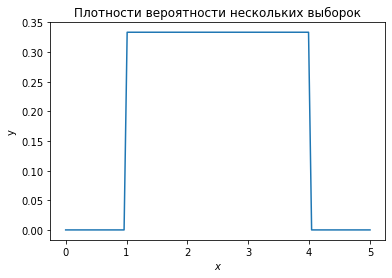

In [61]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

# сгенерируем вектор x для отрисовки значения в pyplot.plot()
x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)

plt.ylabel('y')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.plot(x, pdf)

# Нормализация данных

Операция центрирования

In [62]:
duration = df['duration']
print(statistics.mean(duration))

99.12066686564619


In [63]:
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

2.4903685191438297e-16


Так как среднее значение не равно 0, необходимо нормализовать.

Масштабирование выборки

Разброс данных приводим к виду (0,1)  либо (-1,1)

In [64]:
min(duration_1)

-59.120666865646186

In [65]:
max(duration_1)

1425.8793331343538

In [66]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


# Корелляция Пирсона

Коэффициент корреляции Пирсона: 1.0


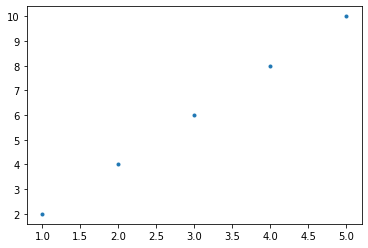

In [67]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

*  Исследуемые переменные X и Y должны быть распределены нормально (делаем допущение, что переменные распределены нормально).
*  Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
*  Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Чем коэффициент ближе к 0, тем более независимы переменные.

In [68]:
corr, p_value = pearsonr(duration, avg_vote)
print(corr)

0.1111789114478771


**Минусы коэффициента корреляции Пирсона:**
- Неустойчивость к выбросам.
- С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

# Пример корелляции данных, загруженных с помощью pandas

Загружаем данные о ценах на авокадо в США

In [32]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url, index_col=False)

Данные представляют собой time-series data, или временной ряд. В каждый из дней даны такие показатели, как:


*   Date - день показания
*   AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
*   Total Volume - сколько всего было куплено авокадо
*   4046 - общее количество авокадо с кодом 4046
*   4225 - общее количество авокадо с кодом 4225
*   4770 - общее количество авокадо с кодом 4770
*   Total Bags - количество проданных брикетов всего
*   Small Bags - количество проданных малых брикетов
*   Large Bags - количество проданных больших брикетов
*   XLarge Bags - количество проданных XLarge брикетов
*   type - conventional или organic
*   year - год продажи
*   region - регион показаний




Более подробно можно почитать о датасете цен на авокадо: https://www.kaggle.com/neuromusic/avocado-prices

Печатаем 5 значений

In [33]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Размер таблицы:

In [34]:
len(df)

18249

Нормализация значений

In [35]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1
0,0.001026,0.000449
1,0.000877,0.000491
2,0.001890,0.000420
3,0.001262,0.000300
4,0.000815,0.000319


Корелляция скорее всего между Total Volume и Total Bags - чем больше покупают авокадо, тем больше покупают сумок, так как эти фрукты нужно в чем-то нести домой.

In [73]:
volume = df_norm[0]
bags = df_norm[1]

Посмотрим насколько они зависят друг от друга, построим для этого точечный график одного атрибута от другого.

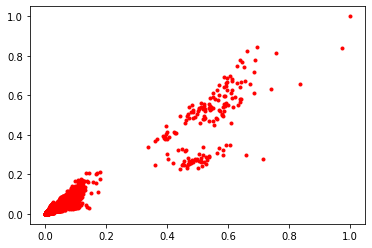

In [74]:
plt.plot(volume, bags, 'r.')
plt.show()

In [75]:
corr, p_value = pearsonr(volume, bags)
print(corr)

0.9630470824267295


Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

Матрица корреляций.

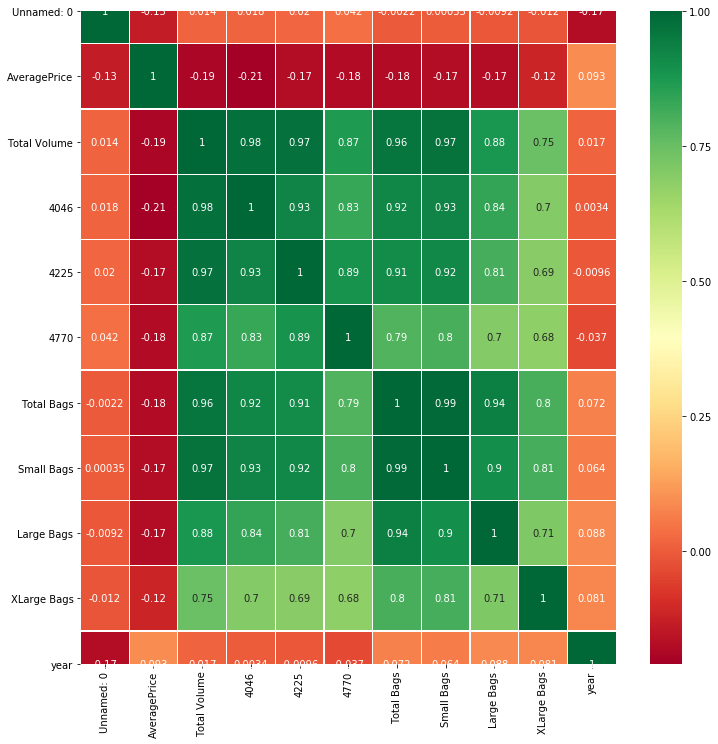

In [76]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


In [77]:
# конвертирование даты в необходимый формат
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


В выборке имеется два вида авокадо: промышленный и органический. Выберем промышленный авокадо для анализа.

In [78]:
PREDICTION_TYPE = 'conventional'
df_conv = df[df.type == PREDICTION_TYPE]

In [79]:
regions = df_conv.groupby(df_conv.region)
print("Всего регионов в выборке :", len(regions))
print("--------------------------")
for name, group in regions:
    print(name, " : ", len(group))

Всего регионов в выборке : 54
--------------------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
St

Сравним изменения цен определенного региона: SanFrancisco.

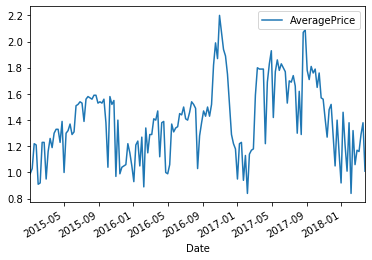

In [80]:
PREDICTING_FOR = "SanFrancisco"
date_price_SF = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)
date_price_SF.plot(x='Date', y='AveragePrice', kind="line")

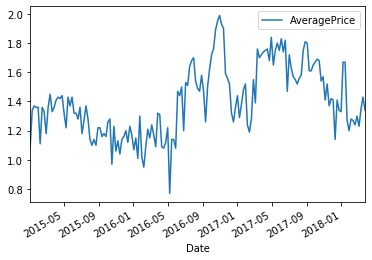

In [96]:
PREDICTING_FOR = "NewYork"
date_price_NY = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)
date_price_NY.plot(x='Date', y='AveragePrice', kind="line")

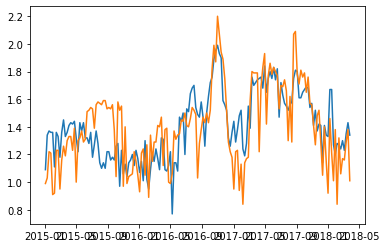

In [103]:
date_price_NY = date_price_NY.sort_values(by=['Date'])
plt.plot(date_price_NY['Date'], date_price_NY['AveragePrice'])
date_price_SF = date_price_SF.sort_values(by=['Date'])
plt.plot(date_price_SF['Date'], date_price_SF['AveragePrice'])

Чем отличаются данные временные показания? Есть периоды, когда показания отличаются (некоторые временные промежутки показывают значительные расхождения, некоторые - похожи). 

Посчитаем корреляцию двух выборок (распределен):

In [105]:
corr, p_value = pearsonr(date_price_NY['AveragePrice'], date_price_SF['AveragePrice'])
print(corr)

0.6731956776436995


Можно заметить, что корреляция незначительна.

# Коэффициент корреляции Кендалла и Спирмена

Если коэффициент корреляции Пирсона показывает **линейную зависимость**, то коэффициент Кендалла и Спирмена показывает зависимость ранговую: возрастание или убывание результативного признака при возрастании факторного. Это показатель тесноты монотонной нелинейной связи.

https://statpsy.ru/correlation/primer-raschet-kendalla/

https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

In [111]:
coef, p = sts.spearmanr(date_price_NY['AveragePrice'], date_price_SF['AveragePrice'])
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = sts.kendalltau(date_price_NY['AveragePrice'], date_price_SF['AveragePrice'])
print('Kendall correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.587
Kendall correlation coefficient: 0.438
